# Fashion MNIST: How CNNs process image data

Improving Computer Vision Accuracy using Convolutions

## Why We need CNN?

In the original images of the Fashion-MNIST dataset, there's a lot of space that's not particularly interesting or useful for telling what type of clothing item is shown in the image. For example, the area around the clothing item is usually just empty background. CNNs allow us to focus on the most important parts of these images.





## Convolutions

In CNNs, we use something called convolutions. Think of a convolution as a small window or filter that we slide over our image. At each step, this filter looks at a certain pixel and its neighboring pixels. Then, it changes the value of the center pixel based on its neighbors' values and the values in our filter. This allows the CNN to emphasize certain features in the image, like the outline of a shoe or the pattern of a shirt.

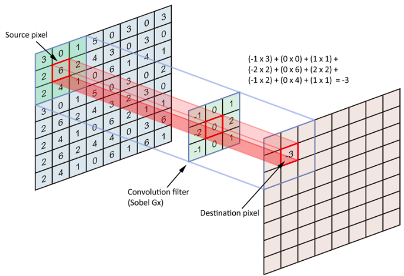




For example, if our window is a 3x3 grid and the center pixel is bright, but all its neighbors are dark, we might reduce its brightness. How exactly we change the center pixel's value depends on the values in our filter.

Doing this for every pixel in the image, we get a new image that highlights specific features, like vertical or horizontal lines. This can make important features in the image stand out more, which can make it easier for a neural network to recognize what the image is showing.


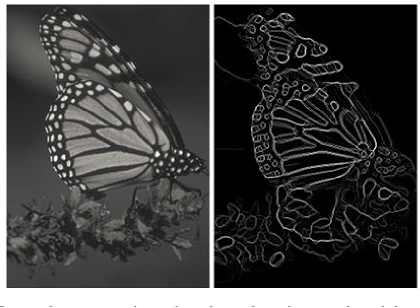

## What DNN’s doing wrong

This process is fundamentally different from how a Deep Neural Network (DNN) operates. A DNN treats each pixel of the image independently and doesn't consider the spatial relationship between pixels. So, if the pixels were shuffled or moved around, the DNN wouldn't notice. This isn't ideal for image data, where the arrangement of pixels is very important.

On the other hand, a CNN takes the spatial relationship between pixels into account. Even if a shoe is on the left or the right of an image, the CNN can still recognize it as a shoe. This is why CNNs are usually more efficient and accurate than DNNs for image classification tasks like classifying images in the Fashion-MNIST dataset.

To summarize, while a DNN sees the image as a flat list of pixels, a CNN sees the image as a real image, paying attention to the spatial relationships between pixels and focusing on the most important parts. This allows CNNs to be more accurate and efficient when classifying images.



## Pooling

Pooling, in the context of a convolutional neural network, is a technique used to reduce the spatial size (width and height) of the input image or feature maps while maintaining the most critical feature information. The main advantage of this is it helps to reduce overfitting by providing a form of translation invariance.

In simpler terms, imagine you're looking at a picture through a small window. You can only see a part of the picture at a time. Pooling is like decreasing the details you see through that window, but maintaining the essential parts.

Let's consider the Max Pooling process, which is one of the most common types of pooling. Here, we move a (usually) 2x2 window across our image or feature map in strides. At each step, we look at the 4 pixels inside the window and take the maximum of these 4 values. This way, even though we reduce the size of our image or feature map to one-fourth of its original size, we keep the most significant parts of it. This is what we refer to when we say pooling helps "preserve the features" while compressing the image.

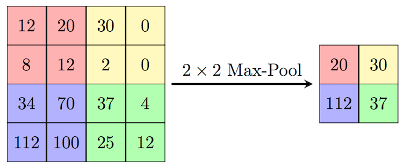

In [ ]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

## Implementing convolutional and pooling layers

This code is a definition of a convolutional neural network model with TensorFlow and Keras. Let's break down the key parts:

1. **`tf.keras.models.Sequential()`**: This is the start of our neural network model. Sequential means that the model is composed of a linear stack of layers.
2. **`tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1))`**: This is the first layer of the network, and it is a 2D convolution layer. This layer will create 64 filters, each with a size of 3x3. 'ReLU' (Rectified Linear Unit) is used as the activation function, which essentially means "if X>0 return X, else return 0" -- so what it does is it only passes values 0 or greater to the next layer in the network.
3. **`tf.keras.layers.MaxPooling2D(2, 2)`**: This layer is the Max Pooling layer, which reduces the size of the image representation without losing important features, thus making computations more manageable.
4. **`tf.keras.layers.Flatten()`**: This layer transforms the format of the images from a 2D-array (or 3D in the case of coloured images), to a 1D-array. It essentially 'unravels' the previous layer, which has many dimensions, into a single long continuous linear vector (a single line of nodes).
5. **`tf.keras.layers.Dense(128, activation='relu')`**: This is a fully connected layer where all 128 nodes (or neurons) in this layer are connected to all nodes in the previous and next layers.
6. **`tf.keras.layers.Dense(10, activation='softmax')`**: This is the last layer, and it has 10 nodes one for each fashion category. The 'softmax' activation function is used on this layer to calculate a probability distribution for each category, meaning each output node will contain the probability that the image belongs to that category. The one with the highest probability is the model's final prediction.

The '64' in the convolution layer stands for the number of filters that will be learned. These filters help in picking out the relevant features in the image, such as edges, corners, etc. They begin as predefined patterns, and over time through training, they adjust to better fit the data.

In summary, the model starts by learning 64 different filters, applying them to the input images, then applying max pooling, then doing another round of convolutions and max pooling. After that, it flattens the output and feeds it to a dense layer with 128 nodes, before making a final prediction using the last dense layer with 10 nodes.

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(64, (3,3), activation='relu',
 input_shape=(28, 28, 1)),
 tf.keras.layers.MaxPooling2D(2, 2),
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

## `model.summary()`

**`model.summary()`**: This line gives a summary of the model, which includes the types of layers in the model, their shapes, and the number of parameters (weights and biases) they have.

## The model is a sequence of layers:

- The first layer is a 2D convolution layer with 64 filters of size 3x3. After this layer, `the output size becomes 26x26x64 instead of 28x28 because the 3x3 filter cannot be applied to the border pixels of the image.`

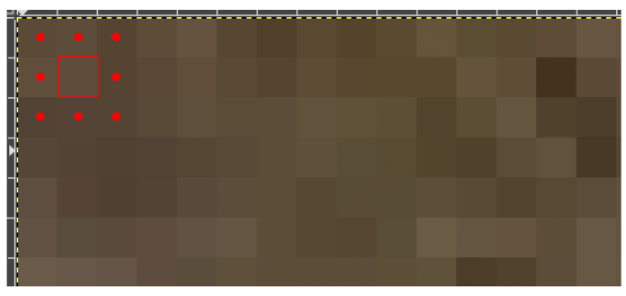

In this case if we use 5x5 convolution filters we will loss 4 border pixels.

- The second layer is a max pooling layer with a pool size of 2x2. This reduces the size of the image by half, from 26x26 to 13x13.
- Another set of convolution and max pooling layers follow, further reducing the image size to 5x5.
- **`Flatten()`**: This layer flattens the output of the previous layer into a 1D array. Since the output from the previous layer is 5x5x64. `There are a number of convolutions per image that we specified, in this case 64. So, there are 64 new images of five-by-five that had been fed in. Flatten that out and you have 25 pixels times 64, which is 1600.`
- **`Dense()`**: These are fully connected layers, the first has 128 neurons and the last one has 10 neurons corresponding to 10 categories. The last layer uses softmax activation to provide the probabilities for each category.

The model first reduces the image size through a series of convolutions and pooling operations. The reduced, filtered images, which are 5x5 instead of the original 28x28, contain the essential features that determine the output. These images are then flattened and passed through fully connected layers for the final classification. This results in faster training while still maintaining high accuracy.

The reduction in size from 28x28 to 26x26 after the first convolution operation is due to the 3x3 filter not being able to be applied to the border pixels of the image. This happens because the filter needs neighbors in all directions, and the border pixels do not have neighbors on one or two sides. Hence, the image is effectively reduced by 2 pixels in both dimensions after convolution with a 3x3 filter. Similarly, the max pooling layer of size 2x2 halves the dimensions of the image, so 26x26 becomes 13x13.

This reduction in image size allows the network to focus on the essential features of the image, speeding up training while also enhancing accuracy by avoiding overfitting to the detailed pixel values of the original image.


In [ ]:
# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

# Visualizing the Convolutions and Pooling

First print out the first 100 test labels and pick out three images that are labeled as boots (0, 23 and 28 has the label of 9. So they are boots)


Then create a new model that outputs the activations of each layer in your trained model for a given input. By feeding the selected images into this model, you can visualize the output of each convolution and pooling layer for these images.

In [ ]:
import numpy as np

In [ ]:
print(test_labels[:100])

In [ ]:
type(test_labels[:100])

In [ ]:
# Value you're looking for
value = 5

# Find the indices
indices = np.where(test_labels[:100] == value)

print(indices)

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

The visualizations show how the images are transformed as they pass through the network. In the first layer, the convolutions seem to pick out the laces of the boots as a common feature. As the images go through more layers, this feature gets more and more abstracted, and less relevant features are filtered out.

The output of each layer is visualized as a heatmap. The colors in the heatmap represent the strength of the activation, with brighter colors indicating stronger activations. By comparing the heatmaps of the different images , you can see how the model processes similar and dissimilar images differently.

`Raws are for different images`

`Colunm are for output of each layer`  

The visualizations shows how the  images are transformed and pixel size of image changing when passing though layers.

- In 1st convolution layer image is 26x26 (1st column)
- In 1st pooling layer image is 13x13 (2nd column)
- In 2nd convolution layer image is 11x11 (3rd column)
- In 2nd pooling layer image is 5x5 (4th column)